In [ ]:
# Downloading The Dataset From my Cloud
!gdown 1CJFyiYDeWOXnCQKiere4pYJ7eedOILE7

Downloading...
From: https://drive.google.com/uc?id=1CJFyiYDeWOXnCQKiere4pYJ7eedOILE7
To: /content/sign_mnist.csv
100% 30.3M/30.3M [00:00<00:00, 121MB/s]


**ML Hand Gesture Recognition Assignmnet.** \
- **In This Jupyter Notebook I Will Implement Different ML Classifier For Hand Gesture Recognition And Will Notedown Its Result and Will Compare Those Results In The Document.**

In [ ]:
# Import the necessary libraries or standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Load Dataset**

**Load the data from the csv file which contains label information at 0th column and remaining columns shows the pixel value at each 784 locations.**

In [ ]:
# Read Data with pandas
df = pd.read_csv('sign_mnist.csv')

# Print first 5 rows of dataset using head
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
df.shape

(10000, 785)

In [ ]:
df.isnull().sum().sum()

0

## **1. CNN Model For Hand Gesture Sign Language Recognition**
---

In [ ]:
# Google Colab offered several helpful python packages to load in, Import all the Required Libraries For CNN
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Activation


**1. In order to feed the model first I have obtained the training data from dataset and load the labels.**\
**2. Use to_categorical to convert the labels into one-hot encoding.**

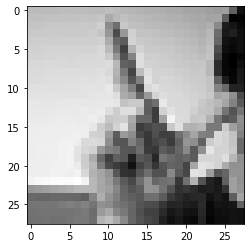

In [ ]:
# Select The Response and Predictor Variables
train=df.drop(['label'], axis = 1) # Features
train = train.values
labels = df['label'] # Labels
labels = to_categorical(labels)
# Take a sample and plot it
sample = train[40]
# Reshape the array as 28 by 28 because the array size is 784
plt.imshow(sample.reshape((28,28)),cmap = plt.get_cmap('gray'))

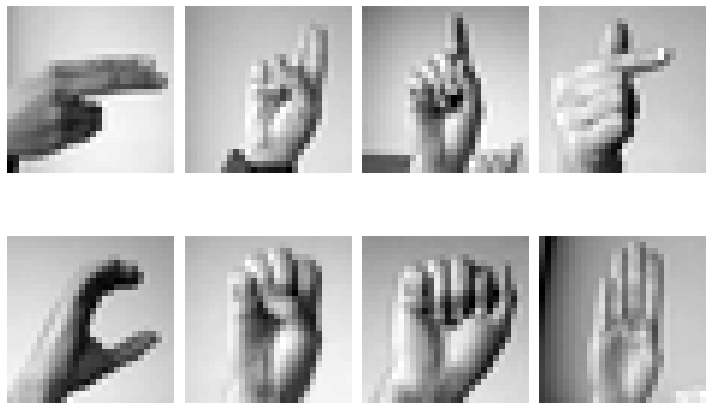

In [ ]:
# get some random index from the train data
random_index = np.random.choice(range(len(train)),12)
# show the 12 random images 
plt.figure(figsize=(10,10))
plt.title("Some Random Training Images")
for i in range(8):
    plt.subplot(3,4,i+1)
    plt.imshow(train[random_index[i]].reshape(28,28),cmap=plt.get_cmap("gray"))
    plt.axis("off")
plt.tight_layout()
plt.show()

**Prepare Training and Testing Dataset**

In [ ]:
print(train.shape,labels.shape)

(10000, 784) (10000, 25)


(10000, 28, 28, 1) (10000, 25)


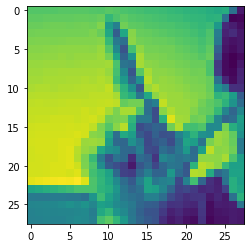

In [ ]:
# Normalize the dataset
train=train/255
train=train.reshape((10000,28,28,1))
plt.imshow(train[40].reshape((28,28)))
print(train.shape,labels.shape)


**Below Is The Neural Network Model:** \
* I make use of Convolutional Neural Network(CNN) as my first classifier. Initial 
layer requires the input shape for each row of our training data which is of the shape (28,28,1) and final layer outputs a 25 dimension output.

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
# Here is the building and training of CNN
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_classifier=model.fit(train, labels, validation_split=0.3, epochs=epochs,batch_size=batch_size)

Epoch 1/10
219/219 [==============================] - 15s 7ms/step - loss: 2.3982 - accuracy: 0.2807 - val_loss: 1.1859 - val_accuracy: 0.6210
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.7050 - accuracy: 0.7650 - val_loss: 0.3955 - val_accuracy: 0.8657
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.2741 - accuracy: 0.9119 - val_loss: 0.1467 - val_accuracy: 0.9567
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.1033 - accuracy: 0.9706 - val_loss: 0.0665 - val_accuracy: 0.9827
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0662 - accuracy: 0.9811 - val_loss: 0.0368 - val_accuracy: 0.9930
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0184 - accuracy: 0.9977 - val_loss: 0.0210 - val_accuracy: 0.9957
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0082 - accuracy: 0.9989 - val_loss: 0.0076 - val_accuracy: 0.9990
Epoch

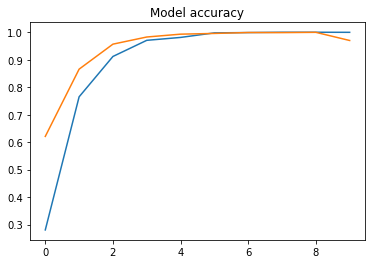

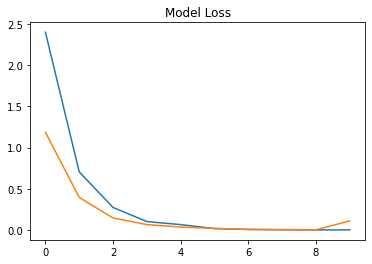

In [ ]:
#Plot the model accuracy and the loss
plt.plot(cnn_classifier.history['accuracy'])
plt.plot(cnn_classifier.history['val_accuracy'])
plt.title('Model accuracy')
plt.show()

plt.plot(cnn_classifier.history['loss'])
plt.plot(cnn_classifier.history['val_loss'])
plt.title('Model Loss')
plt.show()

**Testing**
* For testing I first take a sample from the traning data which in our case is from 4th location which has a label 13 and then need to prepare the data to make it suitable for our model to predict.

In [ ]:
labels_letter = {0:'A',1:'B',2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H',8:'I',9:'J',10:'K', 11:'L', 12:'M',13:'N',
                 14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

Actual Label Index Of Sample Image Is:18
English Letter Of Sample Image Is: S


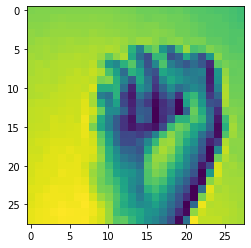

In [ ]:
sample = train[20]
plt.imshow(sample.reshape((28,28)))
letter_index=labels[20]
print(f'Actual Label Index Of Sample Image Is:{list(letter_index).index(1)}')
print(f'English Letter Of Sample Image Is: {labels_letter[list(letter_index).index(1)]}')

* Convert the given image to (1,28,28,1) shape ,normalize it and give it to the model. Find the index of the largest probablitiy from the given set of predictions.

In [ ]:
sample=sample.reshape((1,28,28,1))
res=model.predict(sample)
res=list(res[0])
mx=max(res)
print(f'Predicted Label Index Of Sample Image Is:{res.index(mx)}')
print(f'Predicted English Letter Of Sample Image Is: {labels_letter[res.index(mx)]}')

Predicted Label Index Of Sample Image Is:18
Predicted English Letter Of Sample Image Is: S


## **2. Random Forest Classifier For Hand Gesture Sign Language Recognition**
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

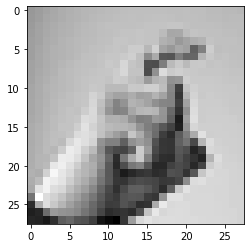

In [ ]:
# Select The Response and Predictor Variables
predictors=df.values[0:,1:]
response = df.values[0:,0]
# Take a sample and plot it
sample = predictors[25]
# Reshape the array as 28 by 28 because the array size is 784
plt.imshow(sample.reshape((28,28)),cmap=plt.get_cmap("gray"))

In [ ]:
# Split the given dataset into training and testing
X = df.iloc[:,1:]
Y = df[['label']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
# Now Train the Model
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
# finding the score of model
X = df.iloc[:,1:]
Y = df.iloc[:,0]
RFC.score(X_test,y_test)

0.9686666666666667

In [ ]:
# Predict the independent variables
res=RFC.predict(X)
res

array([ 3,  6,  2, ..., 24,  5, 22])

In [ ]:
# Finding out the incorrectly identified labels
total_correct_labels = np.sum(np.squeeze(Y) == res)
print(f'Total Incorrect labels are: {len(df) - total_correct_labels}')

Total Incorrect labels are: 94


In [ ]:
# Finding out the total accuracy of model
test_acc = total_correct_labels / Y.shape[0]
print(f"Test Accuracy: {test_acc * 100} %")

Test Accuracy: 99.06 %


In [ ]:
# Finding out the classification report of model
y_pred = RFC.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       125
           1       0.99      0.97      0.98       115
           2       1.00      0.99      1.00       113
           3       0.97      1.00      0.99       117
           4       0.96      0.99      0.97        94
           5       0.98      0.99      0.98       142
           6       0.99      0.97      0.98       113
           7       0.95      0.98      0.97       106
           8       0.98      0.97      0.97       143
          10       0.95      0.91      0.93       117
          11       0.97      0.98      0.98       128
          12       0.94      0.96      0.95       113
          13       0.97      0.97      0.97       120
          14       0.98      0.99      0.99       132
          15       0.97      0.97      0.97       121
          16       0.98      0.99      0.98       160
          17       0.94      0.94      0.94       155
          18       0.98    

In [ ]:
labels_letter = {0:'A',1:'B',2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H',8:'I',9:'J',10:'K', 11:'L', 12:'M',13:'N',
                 14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

Actual Label Index Of Sample Image Is:6
English Letter Of Sample Image Is: G


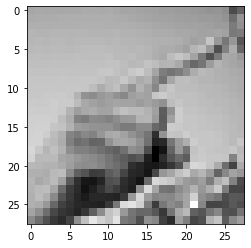

In [ ]:
Imag_number =1
sample = predictors[Imag_number]
plt.imshow(sample.reshape((28,28)),cmap=plt.get_cmap('gray'))
response = df.values[0:,0]
response = to_categorical(response)
letter_index=response[Imag_number]
print(f'Actual Label Index Of Sample Image Is:{list(letter_index).index(1)}')
print(f'English Letter Of Sample Image Is: {labels_letter[list(letter_index).index(1)]}')

In [ ]:
row = sample.reshape(1,-1)
res = RFC.predict(row)
mx=max(res)
print(f'Predicted Label Index Of Sample Image Is:{mx}')
print(f'Predicted English Letter Of Sample Image Is: {labels_letter[(mx)]}')

Predicted Label Index Of Sample Image Is:6
Predicted English Letter Of Sample Image Is: G


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


##**3. SVM(Support Vector Machine) Multiclass Classifier For Hand Gesture Sign Language Recognition**
---

In [ ]:
# Import The Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.utils.np_utils import to_categorical

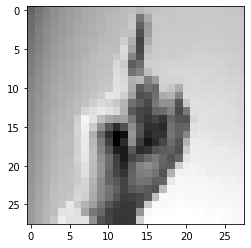

In [ ]:
# Select The Response and Predictor Variables
predictors=df.values[0:,1:]
response = df.values[0:,0]
# Take a sample and plot it
sample = predictors[0]
# Reshape the array as 28 by 28 because the array size is 784
plt.imshow(sample.reshape((28,28)),cmap=plt.get_cmap("gray"))

In [ ]:
# Split the given dataset into training and testing
X = df.iloc[:,1:]
Y = df[['label']]
# Select the test size as 30 percent and it will set the train size as 70 percent.
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#Standardized with Label Encoder
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Train SVM Classifier by keeping decision function shape as one vs all
SVM_classifier = SVC(decision_function_shape='ovr')
SVM_classifier.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = SVM_classifier.predict(X_test)
y_pred

array([ 4, 16, 17, ..., 11, 17, 18])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.984

In [ ]:
# check out the f1 score for the SVM
f1 = f1_score(y_test,y_pred,average='micro')
f1

0.984

In [ ]:
# Check out the confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[119,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0],
       [  0, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  97,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 110,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

In [ ]:
# Classification Report
c_report = classification_report(y_pred, y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       120
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        97
           5       0.99      1.00      0.99       141
           6       0.99      1.00      1.00       110
           7       1.00      1.00      1.00       109
           8       0.99      1.00      1.00       140
           9       0.98      0.98      0.98       111
          10       0.99      1.00      1.00       129
          11       0.99      1.00      1.00       114
          12       1.00      0.96      0.98       125
          13       1.00      1.00      1.00       133
          14       1.00      1.00      1.00       120
          15       0.99      1.00      1.00       160
          16       0.95      0.94      0.95       157
          17       0.96    

In [ ]:
# Following are the labels letter
labels_letter = {0:'A',1:'B',2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H',8:'I',9:'J',10:'K', 11:'L', 12:'M',13:'N',
                 14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

Actual Label Index Of Sample Image Is:3
English Letter Of Sample Image Is: D


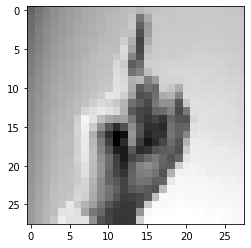

In [ ]:
# Select an image as a sample and check out its letter and actual index
Imag_number =0
sample = predictors[Imag_number]
plt.imshow(sample.reshape((28,28)),cmap = plt.get_cmap('gray'))
response = df.values[0:,0]
response = to_categorical(response)
letter_index=response[Imag_number]
print(f'Actual Label Index Of Sample Image Is:{list(letter_index).index(1)}')
print(f'English Letter Of Sample Image Is: {labels_letter[list(letter_index).index(1)]}')

In [ ]:
# Now Reshape the sample and pass it to the trained model if it give similar to the actual than it is better trained
row = sample.reshape(1,-1)
res = SVM_classifier.predict(row)
mx=max(res)
print(f'Predicted Label Index Of Sample Image Is:{mx}')
print(f'Predicted English Letter Of Sample Image Is: {labels_letter[(mx)]}')

Predicted Label Index Of Sample Image Is:3
Predicted English Letter Of Sample Image Is: D


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#4 Decision tree Classifier

# **#4 Decision tree Classifier**

In [ ]:
# Import The Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from keras.utils.np_utils import to_categorical

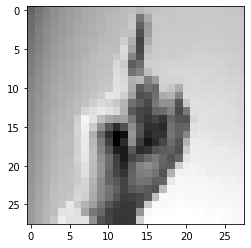

In [ ]:
# Select The Response and Predictor Variables
predictors=df.values[0:,1:]
response = df.values[0:,0]
# Take a sample and plot it
sample = predictors[0]
# Reshape the array as 28 by 28 because the array size is 784
plt.imshow(sample.reshape((28,28)),cmap=plt.get_cmap("gray"))

In [ ]:
# Split the given dataset into training and testing
X = df.iloc[:,1:]
Y = df[['label']]
# Select the test size as 30 percent and it will set the train size as 70 percent.
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#Standardized with Label Encoder
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dec_tree= DecisionTreeClassifier(max_depth=10)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = dec_tree.predict(X_test)
y_pred

array([21, 16, 23, ..., 11, 11, 18])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.515

In [ ]:
# check out the f1 score for the SVM
f1 = f1_score(y_test,y_pred,average='micro')
f1

0.515

In [ ]:
# Check out the confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 91,   0,   0,   1,   5,   3,   0,   0,   4,   2,   0,   6,   0,
          2,   0,   0,   0,   0,   0,   2,   0,   0,   0,   6],
       [  2,  59,   0,   1,   8,   0,   0,   2,   2,   3,   0,   5,   2,
          0,   0,   0,   3,   0,   1,  14,   2,   1,   0,   7],
       [  1,   0,  95,   6,   0,   1,   1,   0,   0,   0,   1,   0,   0,
          1,   0,   1,   0,   0,   0,   1,   0,   0,   0,   4],
       [  0,   6,   0,  64,   0,   4,   3,   0,   0,   7,   0,   5,   2,
          0,   0,   1,   6,   0,   0,   4,   3,   5,   1,   9],
       [  6,   1,   1,   0,  45,   2,   0,   0,   2,   0,   0,  10,   3,
          2,   0,   1,   1,   1,   2,   0,   0,   5,   0,  15],
       [  1,   2,   2,   1,   6,  75,   8,   4,   1,   3,   1,   5,   2,
          5,   0,   1,   1,   0,   2,   1,   8,   1,   3,  10],
       [  0,   1,   3,   0,   0,   4,  74,   4,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   6,   0,  14,   1,   0,   3],
       [  0,   0,   0,   1,   1,   6,  15

In [ ]:
# Classification Report
c_report = classification_report(y_pred, y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       154
           1       0.53      0.60      0.56        98
           2       0.85      0.79      0.82       120
           3       0.53      0.62      0.57       103
           4       0.46      0.37      0.41       122
           5       0.52      0.58      0.55       130
           6       0.67      0.56      0.61       131
           7       0.41      0.65      0.51        69
           8       0.35      0.44      0.39       114
           9       0.52      0.41      0.46       142
          10       0.46      0.72      0.56        83
          11       0.56      0.32      0.41       200
          12       0.49      0.58      0.53       101
          13       0.64      0.75      0.69       114
          14       0.78      0.77      0.77       121
          15       0.66      0.84      0.74       127
          16       0.26      0.47      0.34        88
          17       0.36    

In [ ]:
# Following are the labels letter
labels_letter = {0:'A',1:'B',2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H',8:'I',9:'J',10:'K', 11:'L', 12:'M',13:'N',
                 14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

Actual Label Index Of Sample Image Is:3
English Letter Of Sample Image Is: D


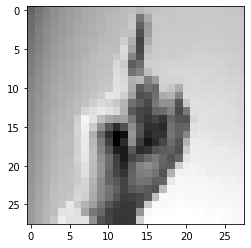

In [ ]:
# Select an image as a sample and check out its letter and actual index
Imag_number =0
sample = predictors[Imag_number]
plt.imshow(sample.reshape((28,28)),cmap = plt.get_cmap('gray'))
response = df.values[0:,0]
response = to_categorical(response)
letter_index=response[Imag_number]
print(f'Actual Label Index Of Sample Image Is:{list(letter_index).index(1)}')
print(f'English Letter Of Sample Image Is: {labels_letter[list(letter_index).index(1)]}')

In [ ]:
# Now Reshape the sample and pass it to the trained model if it give similar to the actual than it is better trained
row = sample.reshape(1,-1)
res = dec_tree.predict(row)
mx=max(res)
print(f'Predicted Label Index Of Sample Image Is:{mx}')
print(f'Predicted English Letter Of Sample Image Is: {labels_letter[(mx)]}')

Predicted Label Index Of Sample Image Is:3
Predicted English Letter Of Sample Image Is: D


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


##**Classifier App**
---

In [ ]:
print('Following Classifier Trained Successfully On The Sign_Mnist Dataset: \n ')
print('1. Convolution Neural Network \n')
print('2. Random Forest Classifier \n')
print('3. SVM Multiclass Classifier \n')
print('4. Decision Tree Classifier \n')

Following Classifier Trained Successfully On The Sign_Mnist Dataset: 
 
1. Convolution Neural Network 

2. Random Forest Classifier 

3. SVM Multiclass Classifier 

4. Decision Tree Classifier 



In [ ]:
# Here Is The App of the above Classifiers
def app(labels,input_image):
  print('Enter 1 For CNN \n', 'Enter 2 For Random Forest Classifier \n', 'Enter 3 for the SVM \n','Enter 4 For Decision Tree Classifier The App \n', 'Enter 5 For Exit The App \n')
  user_input = int(input('Enter Number To Select The Classifier For The Prediction Of Given Image: '))
  if user_input == 1:
    sample=input_image.reshape((1,28,28,1))
    res=model.predict(sample)
    res=list(res[0])
    mx=max(res)
    print('Below Result Shows The CNN Classification Of The Given Image: \n')
    print(f'Predicted Label Index Of Sample Image Is:{res.index(mx)}')
    print(f'Predicted English Letter Of Sample Image Is: {labels[res.index(mx)]}')

  elif user_input == 2:
    row = input_image.reshape(1,-1)
    res = RFC.predict(row)
    mx=max(res)
    print('Below Result Shows The Random Forest Classification Of The Given Image: \n')
    print(f'Predicted Label Index Of Sample Image Is:{mx}')
    print(f'Predicted English Letter Of Sample Image Is: {labels[(mx)]}')
  
  elif user_input == 3:
    row = input_image.reshape(1,-1)
    res = SVM_classifier.predict(row)
    mx=max(res)
    print('Below Result Shows The SVM Classification Of The Given Image: \n')
    print(f'Predicted Label Index Of Sample Image Is:{mx}')
    print(f'Predicted English Letter Of Sample Image Is: {labels[(mx)]}')
  elif user_input == 4:
    row = input_image.reshape(1,-1)
    res = dec_tree.predict(row)
    mx=max(res)
    print('Below Result Shows The SVM Classification Of The Given Image: \n')
    print(f'Predicted Label Index Of Sample Image Is:{mx}')
    print(f'Predicted English Letter Of Sample Image Is: {labels[(mx)]}')
  elif user_input == 5:
    print('The App Closed, Thank You For Using It!')
    exit()
  
  else:
    print('Please Enter The Correct Input...')

In [ ]:
# Here are the labels of the letter along with indices
labels_letter = {0:'A',1:'B',2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H',8:'I',9:'J',10:'K', 11:'L', 12:'M',13:'N',
                 14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

Actual Label Index Of Sample Image Is:3
English Letter Of Sample Image Is: D


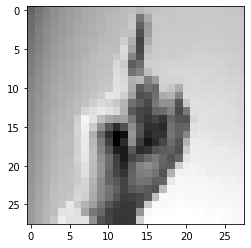

In [ ]:
# Select any image From the Dataset or You may input here your own hand gesture
Imag_number =0
sample_image = predictors[Imag_number]
plt.imshow(sample_image.reshape((28,28)),cmap=plt.get_cmap("gray"))
response = df.values[0:,0]
response = to_categorical(response)
letter_index=response[Imag_number]
print(f'Actual Label Index Of Sample Image Is:{list(letter_index).index(1)}')
print(f'English Letter Of Sample Image Is: {labels_letter[list(letter_index).index(1)]}')

In [ ]:
# Now Pass the sample image and the labels to the classifier app
app(labels_letter, sample_image)

Enter 1 For CNN 
 Enter 2 For Random Forest Classifier 
 Enter 3 for the SVM 
 Enter 4 For Decision Tree Classifier The App 
 Enter 5 For Exit The App 



In [ ]:
app(labels_letter, sample_image)

In [ ]:
app(labels_letter,sample_image)

In [ ]:
app(labels_letter, sample_image)